# Grouping your data


In [ ]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
matplotlib.rcParams['axes.grid'] = True # show gridlines by default
%matplotlib inline

import pandas as pd

In [ ]:
if pd.__version__.startswith('0.23'):
    # this solves an incompatibility between pandas 0.23 and datareader 0.6
    # taken from https://stackoverflow.com/questions/50394873/
    core.common.is_list_like = api.types.is_list_like

from pandas_datareader.wb import download

In [ ]:
?download

In [ ]:
YEAR = 2013
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdp = download(indicator=GDP_INDICATOR, country=['GB','CN'],
start=YEAR-5, end=YEAR)
gdp = gdp.reset_index()
gdp

In [ ]:
gdp.groupby('country')['NY.GDP.MKTP.CD'].aggregate(sum)

In [ ]:
gdp.groupby('year')['NY.GDP.MKTP.CD'].aggregate(sum)

In [ ]:
LOCATION='comtrade_milk_uk_monthly_14.csv'

In [ ]:
milk = pd.read_csv(LOCATION, dtype={'Commodity Code':str, 'Reporter Code':str})
milk.head(3)

In [ ]:
COLUMNS = ['Year', 'Period','Trade Flow','Reporter', 'Partner', 'Commodity','Commodity Code','Trade Value (US$)']
milk = milk[COLUMNS]

In [ ]:
milk_world = milk[milk['Partner'] == 'World']
milk_countries = milk[milk['Partner'] != 'World']

In [ ]:
milk_countries.to_csv('countrymilk.csv', index=False)

In [ ]:
load_test = pd.read_csv('countrymilk.csv', dtype={'Commodity Code':str, 'Reporter Code':str})
load_test.head(2)

In [ ]:
milk_imports = milk[milk['Trade Flow'] == 'Imports']
milk_countries_imports = milk_countries[milk_countries['Trade Flow'] == 'Imports']
milk_world_imports=milk_world[milk_world['Trade Flow'] == 'Imports']

In [ ]:
milkImportsInJanuary2014 = milk_countries_imports[milk_countries_imports['Period'] == 201401]
milkImportsInJanuary2014.sort_values('Trade Value (US$)',ascending=False).head(10)

In [ ]:
groups = milk_countries.groupby('Trade Flow')

In [ ]:
groups.get_group('Imports').head()

In [ ]:
GROUPING_COMMFLOW = ['Commodity Code','Trade Flow']

groups = milk_countries.groupby(GROUPING_COMMFLOW)
groups.groups.keys()

In [ ]:
GROUPING_PARTNERFLOW = ['Partner','Trade Flow']
groups = milk_countries.groupby(GROUPING_PARTNERFLOW)

GROUP_PARTNERFLOW= ('France','Imports')
groups.get_group( GROUP_PARTNERFLOW )

In [ ]:
groups = milk_countries.groupby(['Commodity Code'])
groups.get_group('0402').sort_values("Trade Value (US$)", ascending=False).head()

In [ ]:
data=[['A',10],['A',15],['A',5],['A',20],
['B',10],['B',10],['B',5],
['C',20],['C',30]]

df = pd.DataFrame(data=data, columns=["Commodity","Amount"])
df

In [ ]:
grouped = df.groupby('Commodity')

In [ ]:
grouped.groups.keys()

In [ ]:
grouped.get_group('B')

In [ ]:
grouped = df.groupby( ['Commodity','Year'])

In [ ]:
grouped.get_group( ('A',2014) )

In [ ]:
grouped=df.groupby('Commodity')
grouped.aggregate(sum)

In [ ]:
def top2byAmount(g):
    return g.sort_values('Amount', ascending=False).head(2)
grouped.apply(top2byAmount)

In [ ]:
milk_world_imports.groupby('Commodity Code')['Trade Value (US$)'].aggregate(sum)

In [ ]:
milk_imports_grouped=milk_countries_imports.groupby('Commodity Code')
milk_imports_grouped['Trade Value (US$)'].aggregate(sum)

In [ ]:
milk_countries_imports_totals=milk_countries_imports.groupby('Partner')[['Trade Value (US$)']].aggregate(sum)
milk_countries_imports_totals.sort_values('Trade Value (US$)', ascending=False).head()

In [ ]:
milk_imports_grouped['Trade Value (US$)'].aggregate(sum).plot(kind='barh')

In [ ]:
monthlies=milk_countries_imports.groupby(['Commodity','Trade Flow','Period'])['Trade Value (US$)'].aggregate(sum)
monthlies

In [ ]:
from numpy import mean

GROUPING_COMMFLOWPERIOD=['Commodity','Trade Flow','Period']
milk_countries.groupby(GROUPING_COMMFLOWPERIOD)['Trade Value (US$)'].aggregate([sum, min, max, mean])

In [ ]:
milk_countries_imports.groupby(['Commodity Code','Period'])['Trade Value (US$)'].aggregate(max).plot(kind='barh')

In [ ]:
milk_bypartner_total=milk[milk["Trade Flow"]=='Imports'].groupby(['Partner'])['Trade Value (US$)'].aggregate(sum)
milk_bypartner_total.head(5)

In [ ]:
milk_bypartner_total.sort_values(ascending=False, inplace=False).head(5).plot(kind='barh')

## Filtering groups


Being able to group rows according to some criterion and then apply various operations to
those groups is a very powerful technique.
However, there may be occasions when you only want to work with a subset of the groups
that can be extracted from a single dataset based on a particular group property. For
example, it might require that:
- groups that contain a minimum number of rows, such as countries that engage in
trade around a particular commodity with a minimum number of partner countries

- groups for whom a summary statistic meets certain conditions (for example, the total
value of exports for a particular commodity exceeds a particular threshold value, or
whose minimum or maximum value are below a certain value)

- a ranking of the groups based on a particular summary statistic, such as the total
trade value, that returns only the top five or bottom three groups according to that
ranking.

In the following example, where groups are selected based on group size, a filtering
operation is applied to limit an original dataset so that it includes just those groups
containing at least three rows, combining the rows from the selected groups back together
again to produce the output dataset:


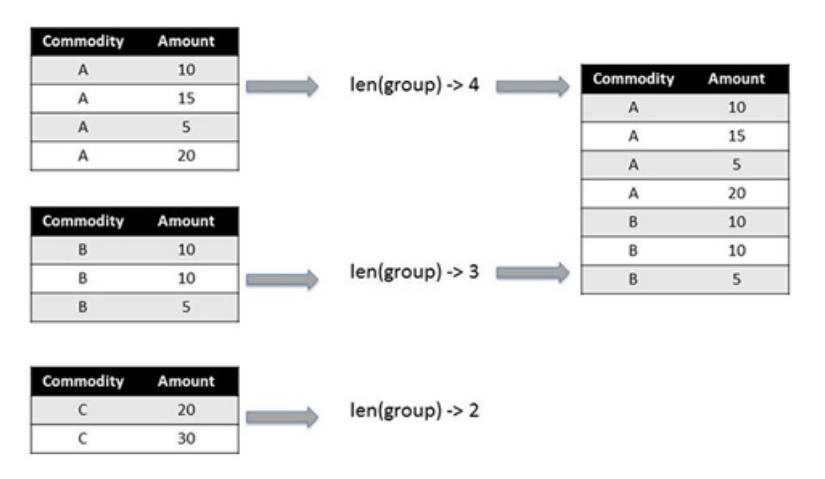

In pandas, groups can be filtered based on their group properties using the filter()
method. Using the example dataframe again:

In [ ]:
df

For example, the dataframe can be filtered to return just the rows from groups where there
is a maximum number of rows in the group.
As a reference point, count how many rows are associated with each group.

In [ ]:
grouped = df.groupby('Commodity')
grouped.aggregate(len)

The **filter()** method uses a function that returns a boolean **( True or False )** value to
decide whether or not to filter through the rows associated with a particular group.
As with the **apply()** method, provide the **filter()** method with just a function name in
order to pass each group to that function. For example, define a function that says
whether or not a group contains three or fewer rows and use that as a basis for filtering the
original dataset.

In [ ]:
def groupsOfAtMostThreeRows(g):
    return len(g) <= 3
grouped.filter(groupsOfAtMostThreeRows)

Alternatively, all the rows in a group can be filtered on an aggregate property of the group
such as the sum total, or maximum, minimum or mean value, from one of the columns.

In [ ]:
#Consider the following total amounts by group
grouped.aggregate(sum)

In [ ]:
pd.pivot_table(df,index=['Commodity','Partner'],values='Amount',aggfunc=sum)

The ability to filter datasets based on group properties means that large datasets can
more easily be limited to just those rows associated with groups of rows that are deemed
to be relevant in some way.

If you have a large dataset that can be split into multiple groups but for which you only want to report on groups that have a particular property, the `filter()` method can be used to apply a test to a group and only return rows from groups that pass a particular group-wide test. If the test evaluates as `False`, the rows included in that group will be ignored.

Consider the following simple test dataset:

In [ ]:
df = pd.DataFrame({'Commodity' : ['Fish', 'Milk', 'Eggs', 'Fish', 'Milk'],
                'Trade Flow' : ['Import', 'Import', 'Import', 'Export','Export'],
                'Value' : [1,2,4,8,16]})
df

One reason for filtering a dataset might be to exclude 'sparse' or infrequently occurring items, such as trade partners who only seem to trade for less than six months of the year.

To select just the groups that contain more than a certain number of rows, define a function to test the length (that is, the number of rows) of each group and return a `True` or `False` value depending on the test.

In the following case, group by trade flow and only return rows from groups containing three or more rows.

In [ ]:
def groupsOfThreeOrMoreRows(g):
    return len(g) >= 3

df.groupby('Trade Flow').filter(groupsOfThreeOrMoreRows)

You can also select groups based on other group properties. For example, you might select just the groups where the total value for a particular column within a group exceeds a certain threshold.

In the following case, select just those commodities where the sum of import and export values is greater than a certain amount to indicate which ones have a large value of trade, in whatever direction, associated with them. First group by the commodity, then filter on the group property of interest.

In [ ]:
def groupsWithValueGreaterThanFive(g):
    return g['Value'].sum() > 5

df.groupby('Commodity').filter(groupsWithValueGreaterThanFive)

### Filtering on the Comtrade data

Now try filtering the Comtrade data relating to the milk imports. Start by creating a subset of the data containing only rows where the total trade value of imports for a particular commodity and partner is greater than $25 million (that is, 25000000).

In [ ]:
def groupsWithImportsOver25million(g):
    return g['Trade Value (US$)'].sum() > 25000000

rows=milk_countries_imports.groupby(['Commodity','Partner']).filter(groupsWithImportsOver25million)

Check the filtering by grouping on the commodity and partner and summing the result.

In [ ]:
rows.groupby(['Commodity','Partner'])['Trade Value (US$)'].aggregate(sum)

As before, you can plot the results.

In [ ]:
rows.groupby(['Commodity','Partner'])['Trade Value (US$)'].aggregate(sum).sort_values(inplace=False,ascending=False).plot(kind='barh')

Logical tests can be combined in a filter function, for example testing for partners that only appear to trade infrequently *or* for small total amounts in any particular commodity.

In [ ]:
def weakpartner(g):
    return len(g)<=3 | g['Trade Value (US$)'].sum()<25000

weak_milk_countries_imports=milk_countries_imports.groupby(['Commodity','Partner']).filter(weakpartner)
weak_milk_countries_imports.groupby(['Commodity','Partner'])[['Trade Value (US$)']].aggregate([len,sum])

In this report, many of the listed countries appear to have traded in only one or two months; but while Hungary traded concentrated/sweetened products eight times, the total trade value was not very significant at all.

### Tasks

Filter the dataset so that it only contains rows where the total exports across all the milk products for a particular country are at least two million dollars in any given monthly period. (HINT: group on partner and period and filter against a function that tests the minimum trade value exceeds the required value.)

Generate a chart from that dataset that displays the sum total trade value for each partner. (HINT: group on the partner and then aggregate on the sum.)

Using your own monthly data for a single year, which countries only trade in your selected trade item rarely or for small amounts? Which partners trade on a regular basis (for example, in at least nine of the months)? 

Can you also find countries that trade regularly but only for small amounts (for example whose maximum monthly trade value is less than a certain threshold amount) or who trade infrequently but for large amounts (or other combinations thereof)?

## Interactive pivot table

One of the most useful, if poorly understood, features offered by many spreadsheet
applications is the ‘pivot table’.
Pivot tables provide a way of creating summary reports over particular parts of a dataset,
reshaping the data into grouped rows, itemised columns, and summary values within
each group and item.

The screenshot of the interactive pivot table shown below, based on a widget originally
created by Nicolas Krutchen at Datacritic, contains a small fragment of the Comtrade data
describing milk imports to the UK.
The pivot table is organised as follows:

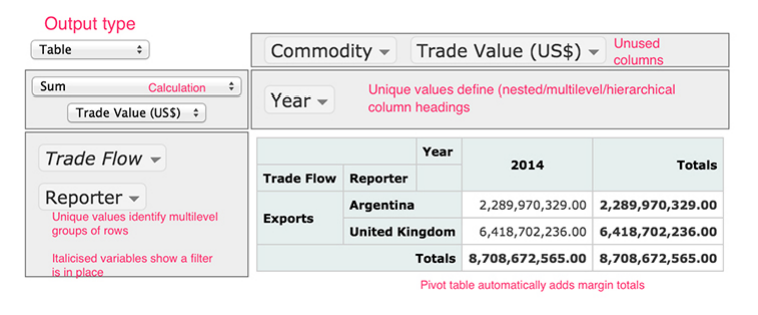

You can see how the ‘Trade Flow’ and ‘Reporter’ columns are used to group the data, with
each row representing a separate group. In addition, the values in the ‘Year’ column are
broken out to create separate columns (although in this example there is only data for one
year, and hence one ‘Year’ column, 2014). The function that is applied to the grouped data
is a sum operation, and it is applied to the selected ‘Trade Value (US$)’ column in the
original dataset. A marginal total value is calculated by summing across all the columns.

The ‘Commodity’ and ‘Trade Value (US$)’ columns, while part of the original dataset, are
not directly used to define the pivot table’s structure; that is, they are not used to set the
row or column index header labels in the displayed pivot table.
In terms of the split-apply-combine pattern, the pivot table operates as follows:

- the column names from the original dataframe that are listed in the rows panel on the
left hand side of the interactive pivot table split the data into a set of groups, with
each row specifying a group

- the pivot table’s columns are set according to the unique values associated with the
specified columns from the orignal dataframe; these break the data down into yet
smaller groups that are associated with each cell.

The selected operator is then applied to each cell level group, the results combined and
an appropriately structured output table is displayed.
To create a pivot table report for a dataset, typically three actions will be needed:

- identify what elements will appear as the row index values – that is, how the rows will
be grouped. Typically, groups will be created based on the unique values within a
single column or a combination of values, one from each of multiple grouping
columns.

- identify what elements will appear as column headings. Again, the column heading
may just be the unique values of a single variable, or combined values across
multiple grouping columns.

- identify what numbers will be reported on. This step may often break down into two
smaller steps:

- to count the number of rows associated with a particular combination of row and
column index values, select the count operation

- to perform an operation on the value of cells in another column, select that
column and then identify what operation to apply to it. 

For example, find the sum or mean values of a numerical quantity associated with rows keyed by the row
and column index values, or count the number of unique values of a particular
variable in rows identified by those key values.


In addition, one or more ‘filters’ can be added to the selection of row and column index
values, either limiting which unique values in each key column to report on, or, by default,
selecting them all.

It is often easier to understand how a pivot table is organised by using it interactively.
You’ll get a chance to do this in the next exercise.

The interactive pivot table contains a fragment of the milk data downloaded from Comtrade relating to the leading partner importers of milk products to the UK. (**Note:** If you can't see the pivot table, check you have downloaded it to the same folder as this notebook and run the cell below.)

Configure the pivot table by dragging the labels into the appropriate row and column selection areas. (You do not need to add all the labels to those areas). Select the aggregation type using the calculation list (which defauts to *count*). Click on the down arrow associated with a label in order to select a subset of values associated with that label.

Use the interactive pivot table to generate reports that display:

- a single column containing the total value of each trade flow for each commodity  each year (in rows: Year, Commodity, Trade Flow; no columns; sum Trade Value(US$))
- for each year and each commodity, a column containing the total trade value by Trade flow (rows: year, commodity; cols Trade Flow; sum trade value)
- the total exports for each partner country (rows) by year (columns). Row: partner, trade flow with filter set to export); col: year; sum trade value

In [ ]:
from IPython.display import HTML,IFrame

IFrame('comtrade_pivot.html',width=1000,height=600)


## Task

Try to come up with some of your own questions and then see if you can use the pivot table to answer them.

For example, see if you can use the table to find:

- the total value by partner country of each commodity type (with each row corresponding to a particular country)
- the total value of trade in commodity type for each month of the year
- the leading partners associated with the 0402 commodity code
- the minimum trade value, by month and commodity type, for Ireland.


**Now go back to the course.**

## Pivot tables with pandas


The interactive pivot table provides a convenient way of exploring a relatively small
dataset directly within a web browser. (A python package is also available that allows
interactive pivot tables to be created directly from a pandas dataframe.)

You can also achieve a similar effect using code, one-line-at-a-time. In this step, you will
learn how to ask – and answer – questions of a similar form to the ones you raised using
the interactive pivot table, but this time using programming code.
There are several reasons why you might want to automate pivot table operations you
might previously have done by hand. These include:

- having a record of all the steps used to perform a particular task, or analysis, which
can be useful if you need to check or provide evidence about what you have done
(transparency)

- being able to repeat the task automatically; this is particularly useful if you need to
perform the same task repeatedly – for example, generating a new summary report
each time a dataset is updated with new weekly or daily figures

- being able to apply one analysis to another dataset. For example, you might want to
produce the same sort of pivot table reports to similarly organised datasets but
differently populated datasets (for example, Comtrade datasets that refer to different
groups of countries and/or different commodity types).
In order to use the interactive pivot table, you had to identify:


- what column(s) in the dataset to use to define the row groupings in the pivot table

- what column(s) in the dataset to use to define the column groupings in the pivot table

- what column in the dataset to use as the basis for the pivot table summary function
what summary function to use.

The process is similar when it comes to using pivot tables in pandas. Indeed, you might
find it useful to use the interactive pivot table to help you identify just what needs to go
where in order to generate a particular report using the pandas pivot table.

Pivot tables can be quite hard to understand, so if you want a gentle dataset to pratice with, here is the simple example dataset used in the previous step that you can try out a few pivot table functions on.

In [ ]:
#Example dataframe
df = pd.DataFrame({"Commodity":["A","A","A","A","B","B","B","C","C"],
                  "Amount":[10,15,5,20,10,10,5,20,30],
                  "Reporter":["P","P","Q","Q","P","P","Q","P","Q"],
                  "Flow":["X","Y","X","Y","X","Y","X","X","Y"]},
                 columns=["Commodity","Reporter","Flow","Amount"])

df

### Getting started with pivot tables in pandas 

The pandas library provides a `pivot_table()` function into which you can pass the elements needed to define the pivot table view you would like to generate over a particular dataset.

If you inspect the documentation for the pandas `pivot_table()` function, you will see that it is quite involved (but *DON'T PANIC!*).

In [ ]:
##Inspect the documentation for the pandas pivot_table() function
##Uncomment the following command (remove the #) and then click the play button in the toolbar to run the cell
#?pivot_table
##The documentation file should pop up from the bottom of the browser.
##Click the x to close it.

You can start to use the pivot table quite straightforwardly, drawing inspiration from the way you configured the interactive pivot table. The function itself takes the form:

`pd.pivot_table(DATAFRAME,
                index= (LIST_OF_)DATA_COLUMN(S)_THAT_DEFINE_PIVOT_TABLE_ROWS,
                columns= (LIST_OF_)DATA_COLUMN(S)_THAT_DEFINE_PIVOT_TABLE_COLUMNS
                values= DATA_COLUMN_TO_APPLY_THE SUMMARYFUNCTION_TO,
                aggfunc=sum
               )`


You can generate a pivot table that shows the total trade value as a single column, grouped into row based subdivisions based on year, country, trade flow and commodity in the following way.

The following pivot table reports on a subset of countries. The `isin()` method selects rows whose partner value 'is in' the list of specified partners.

In [ ]:
KEYPARTNERS = ['Belgium','France','Germany','Ireland','Netherlands','Denmark']
milk_keypartners = milk_countries[milk_countries['Partner'].isin(KEYPARTNERS)]

pd.pivot_table(milk_keypartners,
               index=['Year','Partner','Trade Flow','Commodity'],
               values='Trade Value (US$)',
               aggfunc=sum)

If you just want to use a single data column from the original dataset to specify the row (that is, the `index`) groupings or the column groupings, you don't need to use a list, just pass in the name of the appropriate original data column.

So, to look at rows grouped by year, country and commodity, and split columns out by trade flow:

In [ ]:
#For convenience, let's assign the output of this pivot table operation to a variable...
report = pd.pivot_table(milk_keypartners,
               index=['Year','Partner','Commodity'],
               columns='Trade Flow',
               values='Trade Value (US$)',
               aggfunc=sum)

#And then display the result, sorted by import value
report.sort_values('Imports', ascending=False)

One of the features of the interactive pivot table you did not explore was its ability to generate bar chart style views over the pivoted data as well as tabulated results. (In fact, this requires a plugin to the pivot table that has not been installed.)

In the same way that you produced charts from pandas dataframes previously, you can visualise the contents of the dataframe produced from the pivot table operation.

In [ ]:
report.sort_values('Imports').plot(kind='barh')

Here, the `.plot()` command produces a *grouped bar chart* with the bars grouped according to the order of the row index values. The values contained within any numerical columns are then displayed as bars.

### Task

Using your own data set containing data for both imports and exports of a particular trade item, see if you can use a pandas pivot table to answer the same questions you asked on the late analysis we did, as well as asking some new ones.

For example, try to use a pivot table to identify partner countries engaging in 'bi-derectional' trade who have total import values and export values greater than a certain threshold every month.

You can also use a pivot table in combination with other operations. For example, try using one of the filtered datasets you created using the `filter()` function, such as one that limited rows to partners trading above a certain level, as the basis for a pivot table report.

**Exploring open data further**

The last few years has seen a wide variety of local and national governments and
agencies publishing data as ‘open data’ that can be freely re-used by anyone. Explore
some of this data yourself, at the following links:

- [UK government open data site](http://data.gov.uk/) – a directory of UK public datasets

- [US government open data site](http://data.gov/) – the home of the US Government’s open data

- [Open Knowledge Global Open Data Index](http://index.okfn.org/dataset/) – a comprehensive directory of national
open data initiatives

- [Open Data Inception](http://opendatainception.io/) – a geographic list of over 1500 data portals around the world

- [Google Public Data Explorer](https://www.google.com/publicdata/directory) – a further list of data providers, with charts for some
datasets

- Many towns and cities also have their own data sites: search for the name of your
town and the keywords ‘open data store’